In [51]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

### Que-1 : Write a Python program to compute and display the histogram of a grayscale image using NumPy (manual method), without using cv2.calcHist().


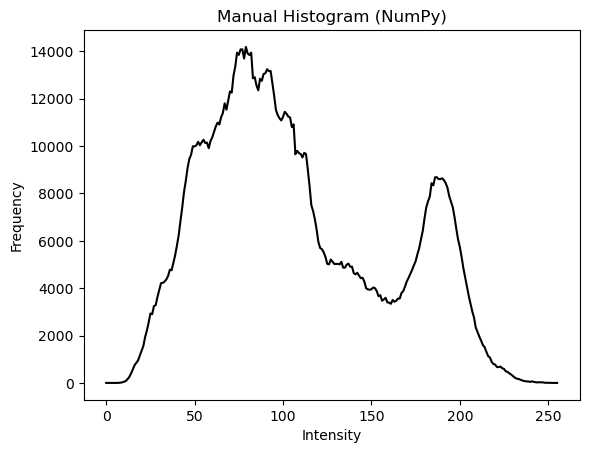

In [37]:
# Load grayscale image
img = cv2.imread('/Users/dhruvpatel/Pictures/pink flower.jpeg', 0)

# Manual histogram
hist, bins = np.histogram(img.flatten(), 256, [0, 256]) #flatten used to convert 1-D array.

# Display
plt.plot(hist, color='black')
plt.title("Manual Histogram (NumPy)")
plt.xlabel("Intensity")
plt.ylabel("Frequency")
plt.show()

### Que-2 : Write a Python program that performs contrast stretching on a grayscale image using the formula: and display the before–after images.


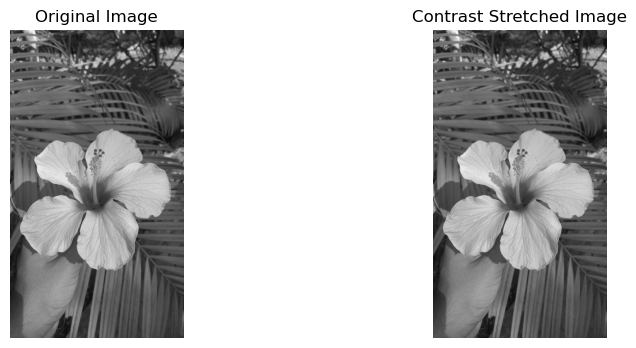

In [7]:

#Load image in grayscale
img = cv2.imread('/Users/dhruvpatel/Pictures/pink flower.jpeg', 0)

# Find minimum and maximum pixel values
r_min = np.min(img)   # darkest pixel in the image
r_max = np.max(img)   # brightest pixel in the image

# Apply contrast stretching formula
# Move values from range [r_min, r_max] → [0, 255]
stretched = (img - r_min) / (r_max - r_min)   # Now range becomes [0, 1]
stretched = stretched * 255                   # Scale to [0, 255]
stretched = stretched.astype(np.uint8)        # Convert to 8-bit image

#Display Original vs Contrast Stretched image
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)   #(1 row, 2 colums, this is position 1 (left image))
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1,2,2)   #(1 row, 2 colums, this is position 2 (right image))
plt.imshow(stretched, cmap='gray')
plt.title("Contrast Stretched Image")
plt.axis('off')

plt.show()


### Que-3 : Write a program using OpenCV to apply histogram equalisation to the image “building.jpg” and display both the equalised image and its histogram.


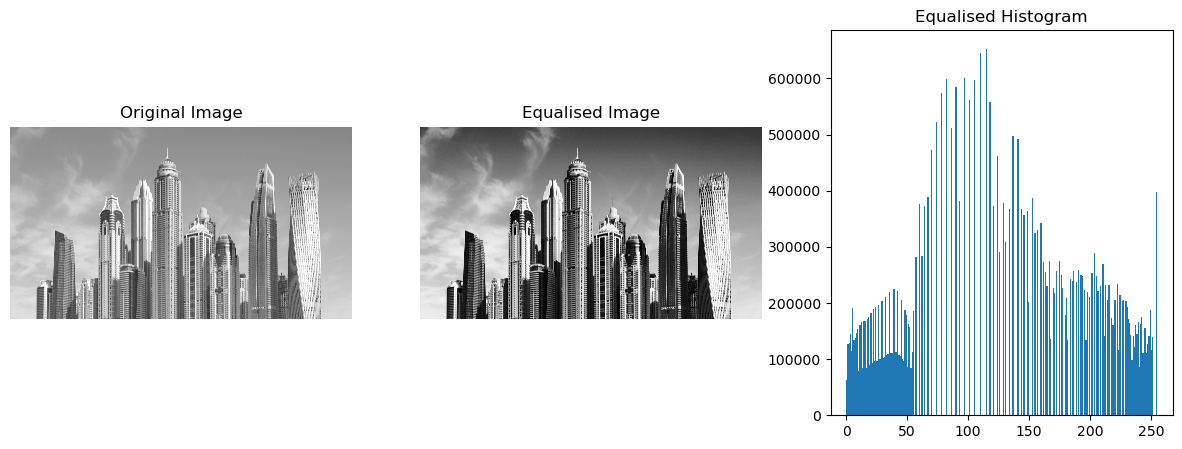

In [38]:

# Load image in grayscale
img = cv2.imread("/Users/dhruvpatel/Pictures/building.jpg", 0)

# Apply histogram equalization
#  This spreads pixel values to improve contrast
equalized = cv2.equalizeHist(img)

# Display results
plt.figure(figsize=(15,5))

# Show original image
plt.subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Show equalized image
plt.subplot(1,3,2)
plt.imshow(equalized, cmap='gray')
plt.title("Equalised Image")
plt.axis('off')

# Show histogram of equalized image
plt.subplot(1,3,3)
plt.hist(equalized.ravel(), 256)
plt.title("Equalised Histogram")

plt.show()


### Que-4 : Write a Python code snippet to apply CLAHE (clipLimit = 3.0, tileGridSize = (8,8)) to “xray.png” and save the enhanced image as “xray_clahe.png”.


In [39]:

# CLAHE = Contrast Limited Adaptive Histogram Equalization

#Load the x-ray image
img = cv2.imread('/Users/dhruvpatel/Pictures/x-ray.png', 0)

# clipLimit = 3.0 → controls contrast
# tileGridSize = (8,8) → divides image into 8x8 tiles
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))

#Apply CLAHE to the image
clahe_img = clahe.apply(img)

#save image in ouput
cv2.imwrite("xray_clahe.png", clahe_img)

True

### Que-5  Write a Python program to add Gaussian noise (mean = 0, std = 20) to an image and then denoise it using a 5×5 Gaussian filter. Display all three: original, noisy, and filtered image.


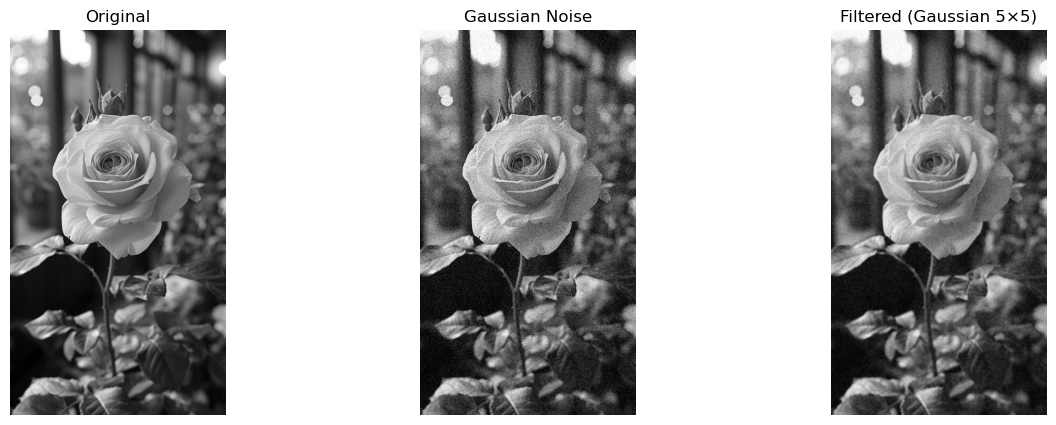

In [36]:

img = cv2.imread("/Users/dhruvpatel/Pictures/flower.jpg", 0)

noise = np.random.normal(0, 20, img.shape)      #0=mean,std=20
noisy = img.astype(np.float32) + noise          #add noise image
noisy = np.clip(noisy, 0, 255).astype(np.uint8) #clip value

filtered = cv2.GaussianBlur(noisy,(5,5),0)   # Apply 5×5 Gaussian filter to remove noise

plt.figure(figsize=(15,5))
plt.subplot(1,3,1); 
plt.imshow(img, cmap='gray'); 
plt.title("Original"); 
plt.axis('off')

plt.subplot(1,3,2); 
plt.imshow(noisy, cmap='gray'); 
plt.title("Gaussian Noise"); 
plt.axis('off')

plt.subplot(1,3,3); 
plt.imshow(filtered, cmap='gray'); 
plt.title("Filtered (Gaussian 5×5)"); 
plt.axis('off')
plt.show()


### Que-6: Write a Python program that adds salt-and-pepper noise to an image and then removes it using a 5×5 median filter. Display the result.


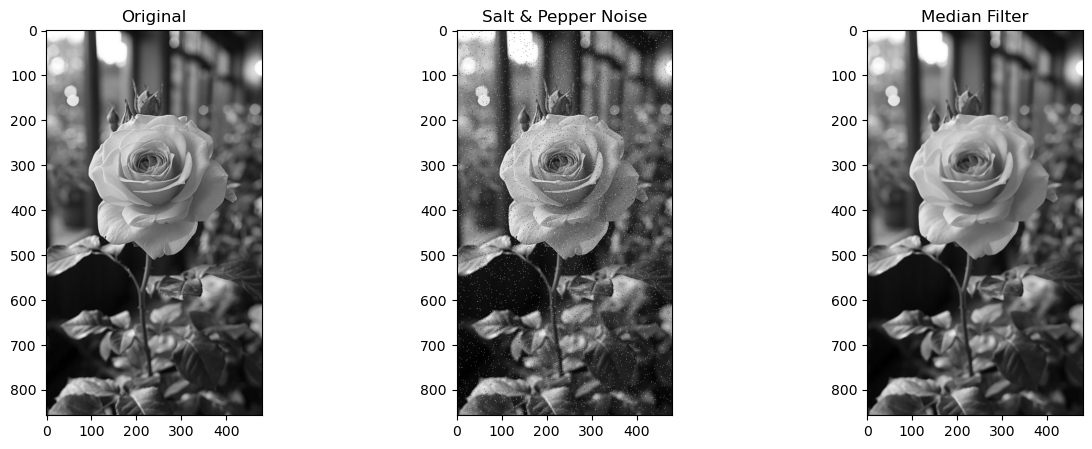

In [43]:
#load image
img = cv2.imread('/Users/dhruvpatel/Pictures/flower.jpg', 0)

# Create a copy for adding noise
noisy = img.copy()
prob = 0.02   # 2% noise

# Number of pixels to change (salt + pepper)
num = int(prob * img.size / 2)

# Add SALT noise (white pixels = 255)
salt_coords = (np.random.randint(0, img.shape[0], num),
               np.random.randint(0, img.shape[1], num))
noisy[salt_coords] = 255

# Add PEPPER noise (black pixels = 0)
pepper_coords = (np.random.randint(0, img.shape[0], num),
                 np.random.randint(0, img.shape[1], num))
noisy[pepper_coords] = 0

# Apply median filter (best for salt & pepper)
filtered = cv2.medianBlur(noisy, 5)

plt.figure(figsize=(15,5))

plt.subplot(1,3,1); 
plt.imshow(img, cmap="gray"); 
plt.title("Original")

plt.subplot(1,3,2); 
plt.imshow(noisy, cmap="gray"); 
plt.title("Salt & Pepper Noise")

plt.subplot(1,3,3); 
plt.imshow(filtered, cmap="gray"); 
plt.title("Median Filter")

plt.show()


### Que-7 : Write a short code snippet to apply an averaging filter (kernel size 7×7) to smooth “portrait.jpg” and display the output using Matplotlib.


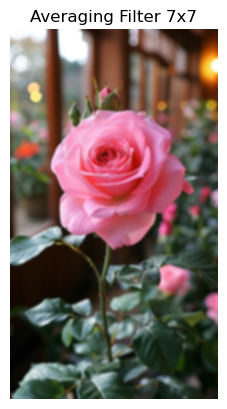

In [44]:
#load image
img = cv2.imread("/Users/dhruvpatel/Pictures/flower.jpg")

#convert IMAGE from BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

smooth = cv2.blur(img, (7,7))

plt.imshow(smooth)
plt.title("Averaging Filter 7x7")
plt.axis("off")
plt.show()

### Que-8 : Write a Python program using OpenCV to apply a bilateral filter (d = 9, sigmaColor = 75, sigmaSpace = 75) to “face.jpg” and compare the original and filtered images side by side.


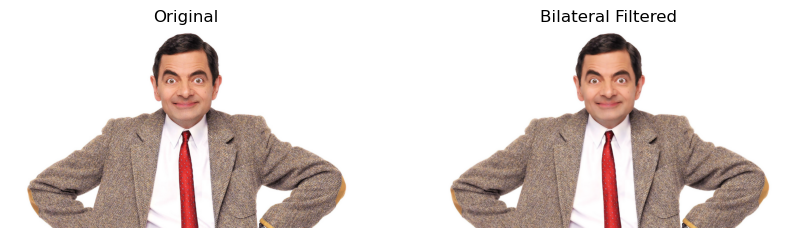

In [47]:
#load image
img = cv2.imread('/Users/dhruvpatel/Pictures/Mr.Bean face smile.jpg')

# convert image BGR to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Apply Bilateral Filter
filtered = cv2.bilateralFilter(img_rgb, d=9, sigmaColor=75, sigmaSpace=75)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title("Original")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(filtered)
plt.title("Bilateral Filtered")
plt.axis('off')

plt.show()

### Que-9 : Write a program to plot histograms of an image before and after Gaussian smoothing (kernel = 5×5). Comment in one line: “How does smoothing change the histogram shape?”


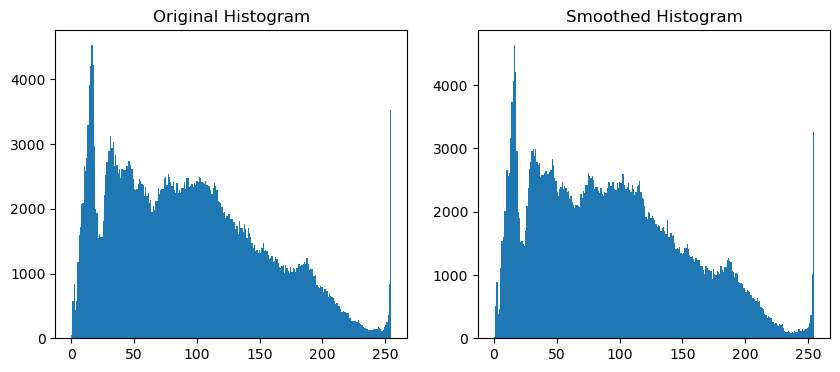

Smoothing makes the histogram narrower and reduces sharp peaks.


In [50]:
img = cv2.imread("/Users/dhruvpatel/Pictures/flower.jpg", 0)
smooth = cv2.GaussianBlur(img, (5,5), 0)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1);
plt.hist(img.flatten(), 256);
plt.title("Original Histogram")

plt.subplot(1,2,2); 
plt.hist(smooth.flatten(), 256); 
plt.title("Smoothed Histogram")
plt.show()

print("Smoothing makes the histogram narrower and reduces sharp peaks.")

### Que-10 :  Write a Python snippet that compares the MSE of: a noisy image, a Gaussian-blurred version of the noisy image. Which has lower MSE? Print the conclusion.

In [52]:

# Load original image in grayscale
img = cv2.imread("/Users/dhruvpatel/Pictures/flower.jpg", 0)

# Add Gaussian noise (mean=0, std=20)
noise = np.random.normal(0, 20, img.shape)
noisy = img.astype(np.float32) + noise
noisy = np.clip(noisy, 0, 255).astype(np.uint8)

# Apply Gaussian blur to reduce noise
blur = cv2.GaussianBlur(noisy, (5,5), 0)

# Function to compute MSE between two images
def mse(a, b):
    return np.mean((a.astype("float") - b.astype("float")) ** 2)

# Calculate MSE values
mse_noisy = mse(img, noisy)
mse_blur  = mse(img, blur)

# Print results
print("MSE of Noisy Image      :", mse_noisy)
print("MSE after Gaussian Blur :", mse_blur)

# Conclusion
if mse_blur < mse_noisy:
    print("Conclusion: Blurred image has LOWER MSE → Gaussian blur improves image quality.")
else:
    print("Conclusion: Noisy image has lower MSE (rare case).")

MSE of Noisy Image      : 371.2158182613769
MSE after Gaussian Blur : 49.71912922987165
Conclusion: Blurred image has LOWER MSE → Gaussian blur improves image quality.
